## Job Shop Scheduling Problem

The Job Shop Scheduling Problem (JSSP) is an NP-hard problem defined by a set of jobs that must be executed by a set of machines in a specific order for each job. Each job has a defined execution time for each machine and a defined processing order of machines. Also, each job must use each machine only once. The machines can only execute a job at a time and once started, the machine cannot be interrupted until the completion of the assigned job. The objective is to minimize the makespan, i.e. the maximum completion time among all jobs.

For instance, suppose we have 3 machines and 3 jobs. The processing order for each job is as follows (the processing time of each job in each machine is between parenthesis):

Job 𝑗1: 𝑚3 (2) → 𝑚1 (1) → 𝑚2 (2)

Job 𝑗2: 𝑚2 (1) → 𝑚3 (2) → 𝑚1 (2)

Job 𝑗3: 𝑚3 (1) → 𝑚2 (2) → 𝑚1 (1)

Bellow there are two feasible schedules:

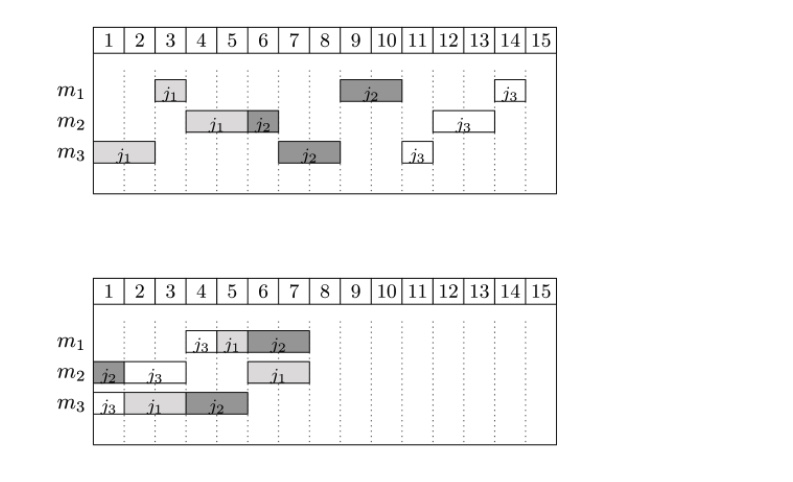

The first schedule shows a naive solution: jobs are processed in a sequence and machines stay idle quite often. The second solution is the optimal one, where jobs execute in parallel.

The JSSP has the following input data:


set of jobs, ={1,...,𝑛},


set of machines, ={1,...,𝑚},

𝑜𝑗𝑟
the machine that processes the 𝑟-th operation of job 𝑗, the sequence without repetition 𝑂𝑗=(𝑜𝑗1,𝑜𝑗2,...,𝑜𝑗𝑚) is the processing order of 𝑗,

𝑝𝑖𝑗
non-negative integer processing time of job 𝑗 in machine 𝑖.

A JSSP solution must respect the following constraints:

All jobs 𝑗 must be executed following the sequence of machines given by 𝑂𝑗,

Each machine can process only one job at a time,

Once a machine starts a job, it must be completed without interruptions.

The objective is to minimize the makespan, the end of the last job to be executed. The JSSP is NP-hard for any fixed 𝑛≥3 and also for any fixed 𝑚≥3.

The decision variables are defined by:

𝑥𝑖𝑗
starting time of job 𝑗∈𝐽 on machine 𝑖∈𝑀

𝑦𝑖𝑗𝑘=
⎧⎩⎨⎪⎪1,0,if job 𝑗 precedes job 𝑘 on machine 𝑖,𝑖∈, 𝑗,𝑘∈, 𝑗≠𝑘otherwise

𝐶
variable for the makespan

Follows a MIP formulation [Mann60] for the JSSP. The objective function is computed in the auxiliary variable 𝐶. The first set of constraints are the precedence constraints, that ensure that a job on a machine only starts after the processing of the previous machine concluded. The second and third set of disjunctive constraints ensure that only one job is processing at a given time in a given machine. The 𝑀 constant must be large enough to ensure the correctness of these constraints. A valid (but weak) estimate for this value can be the summation of all processing times. The fourth set of constrains ensure that the makespan value is computed correctly and the last constraints indicate variable domains.



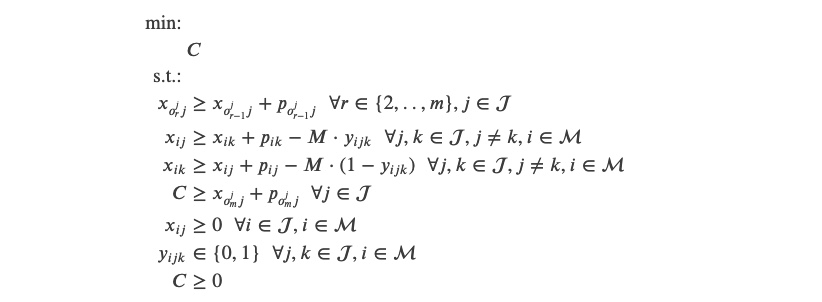

In [1]:
from itertools import product
from mip import Model, BINARY

n = m = 3

times = [[2, 1, 2],
         [1, 2, 2],
         [1, 2, 1]]

M = sum(times[i][j] for i in range(n) for j in range(m))

machines = [[2, 0, 1],
            [1, 2, 0],
            [2, 1, 0]]

model = Model('JSSP')

c = model.add_var(name="C")
x = [[model.add_var(name='x({},{})'.format(j+1, i+1))
      for i in range(m)] for j in range(n)]
y = [[[model.add_var(var_type=BINARY, name='y({},{},{})'.format(j+1, k+1, i+1))
       for i in range(m)] for k in range(n)] for j in range(n)]

model.objective = c

for (j, i) in product(range(n), range(1, m)):
    model += x[j][machines[j][i]] - x[j][machines[j][i-1]] >= \
        times[j][machines[j][i-1]]

for (j, k) in product(range(n), range(n)):
    if k != j:
        for i in range(m):
            model += x[j][i] - x[k][i] + M*y[j][k][i] >= times[k][i]
            model += -x[j][i] + x[k][i] - M*y[j][k][i] >= times[j][i] - M

for j in range(n):
    model += c - x[j][machines[j][m - 1]] >= times[j][machines[j][m - 1]]

model.optimize()

print("Completion time: ", c.x)
for (j, i) in product(range(n), range(m)):
    print("task %d starts on machine %d at time %g " % (j+1, i+1, x[j][i].x))

Welcome to the CBC MILP Solver 
Version: devel 
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Dual Simplex

Coin0506I Presolve 45 (0) rows, 28 (-9) columns and 126 (0) elements
Clp0014I Perturbing problem by 0.001% of 1.3908042 - largest nonzero change 7.1258606e-05 ( 0.005123554%) - largest zero change 7.0163375e-05
Clp0000I Optimal - objective value 5
Coin0511I After Postsolve, objective 5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 5 - 21 iterations time 0.002, Presolve 0.00

Starting MIP optimization
Cgl0004I processed model has 27 rows, 28 columns (18 integer (18 of which binary)) and 72 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 1.128%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc0038I Initial state - 12 integers unsatisfied sum - 2.42857
Cbc0038I Pass   1: suminf.    2.42857 (10) obj. 7 iterations 6
Cbc0038I Pass   2: suminf.    0.00000 (0) obj. 15 iterati